# **Завдання: Чому впали продажі освітніх курсів?**

Ваша компанія займається продажем онлайн-курсів з програмування. Курси продаються протягом усього року. У вас є синтетичні дані про продажі за 2 роки — з січня 2023 по травень 2025.

Останнім часом менеджмент занепокоєний: у травні 2025 року продажі суттєво впали.
Вас, як аналітика, просять терміново розібратись:

* **Чому впали продажі?**
* **Що робити: змінювати маркетинг? Перезапускати курси? Вводити знижки?**


### Етап 1: Первинний аналіз даних (EDA)

In [6]:
import pandas as pd

In [7]:
from google.colab import files
uploaded = files.upload()

Saving course_sales.csv to course_sales (1).csv


In [8]:
df = pd.read_csv('course_sales.csv')
df

,Дата продажу,Назва курсу,Вартість$,Кіл-ть,Всього
0,"Jan 01, 2023",Python нач,50,18.0,900
1,01.01.23,DS Boot,200,10.0,2000
2,"Jan 01, 2023",Web-разработка,80,16.0,1280
3,01/01/2023,Machine Learning ADV,250,11.0,2750
4,2023-01-01,SQL БАЗОВЫЙ,60,13.0,780
...,...,...,...,...,...
4505,08/02/2025,Продвинутый ML,250,15.0,3750
4506,27.10.24,web_dev,80,15.0,1200
4507,"Jan 27, 2025",python for beginners,50,16.0,800
4508,20/03/2025,Данные.Наука,200,17.0,3400


In [9]:
df.drop_duplicates(inplace=True) # видаляємо дублікати

In [10]:
df.rename(
    columns={
      'Дата продажу': 'sales_date',
      'Назва курсу': 'name_course',
      'Вартість$': 'cost',
      'Кіл-ть': 'quantity',
      'Всього': 'amount'
         },
    inplace=True
)

In [11]:
df.head()

,sales_date,name_course,cost,quantity,amount
0,"Jan 01, 2023",Python нач,50,18.0,900
1,01.01.23,DS Boot,200,10.0,2000
2,"Jan 01, 2023",Web-разработка,80,16.0,1280
3,01/01/2023,Machine Learning ADV,250,11.0,2750
4,2023-01-01,SQL БАЗОВЫЙ,60,13.0,780


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sales_date   4410 non-null   object 
 1   name_course  4410 non-null   object 
 2   cost         4410 non-null   int64  
 3   quantity     4310 non-null   float64
 4   amount       4410 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 206.7+ KB


In [13]:
df['sales_date'].unique()

array(['Jan 01, 2023', '01.01.23', '01/01/2023', ..., '2025/05/31',
       '31/05/2025', '31.05.25'], dtype=object)

In [14]:
from dateutil.parser import parse

def date_parse(item):
  try:
    return parse(item).strftime('%Y-%m-%d')
  except:
    return None

df.sales_date = df.sales_date.apply(date_parse)

In [15]:
df['sales_date'] = pd.to_datetime(df.sales_date, format='%Y-%m-%d')

In [16]:
start_date = '2023-01-01'
end_date = '2025-05-31'

df = df[(df['sales_date'] >= start_date) & (df['sales_date'] <= end_date)]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sales_date   4335 non-null   datetime64[ns]
 1   name_course  4335 non-null   object        
 2   cost         4335 non-null   int64         
 3   quantity     4236 non-null   float64       
 4   amount       4335 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 203.2+ KB


In [18]:
df['name_course'].unique()

array(['Python нач', 'DS Boot', 'Web-разработка', 'Machine Learning ADV',
       'SQL БАЗОВЫЙ', 'Python For Beginners', 'data science bootcamp',
       'Быстрый курс SQL', 'Data Science BOOTCAMP', 'Web Dev 101',
       'Продвинутый ML', 'Питон для начинающих', 'Данные.Наука',
       'machine learning advanced', 'sql-cc', 'веб разработка',
       'SQL-Курс', 'WEB DEVELOPMENT', 'ML (уровень 2)',
       'python for beginners', 'web_dev', 'машинное обучение+',
       'Буткемп по Data Science', 'sql crash course', 'PYTHON-BEGINNERS'],
      dtype=object)

In [19]:
df.name_course.replace({'Python нач': 'python for beginners','Питон для начинающих': 'python for beginners', 'Python For Beginners': 'python for beginners', 'PYTHON-BEGINNERS': 'python for beginners',
                        'DS Boot':'data science bootcamp', 'Data Science BOOTCAMP': 'data science bootcamp', 'Буткемп по Data Science': 'data science bootcamp','Данные.Наука': 'data science bootcamp',
                        'Web-разработка': 'web development', 'Web Dev 101': 'web development', 'веб разработка': 'web development', 'WEB DEVELOPMENT': 'web development', 'web_dev': 'web development',
                        'Machine Learning ADV': 'machine learning advanced', 'ML (уровень 2)':'machine learning advanced', 'машинное обучение+':'machine learning advanced', 'Продвинутый ML':'machine learning advanced',
                        'SQL БАЗОВЫЙ': 'sql crash course', 'Быстрый курс SQL': 'sql crash course', 'sql-cc': 'sql crash course','SQL-Курс': 'sql crash course'}, inplace=True)
df.name_course.unique()

/tmp/ipython-input-2528272386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.name_course.replace({'Python нач': 'python for beginners','Питон для начинающих': 'python for beginners', 'Python For Beginners': 'python for beginners', 'PYTHON-BEGINNERS': 'python for beginners',
/tmp/ipython-input-2528272386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

array(['python for beginners', 'data science bootcamp', 'web development',
       'machine learning advanced', 'sql crash course'], dtype=object)

In [20]:
df['name_course'] = df.name_course.astype('category')

/tmp/ipython-input-2660783721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name_course'] = df.name_course.astype('category')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sales_date   4335 non-null   datetime64[ns]
 1   name_course  4335 non-null   category      
 2   cost         4335 non-null   int64         
 3   quantity     4236 non-null   float64       
 4   amount       4335 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 173.8 KB


In [22]:
df['quantity'].unique()

array([ 18.,  10.,  16.,  11.,  13.,  12.,  19.,  14.,  15.,   9.,  90.,
        nan,  25.,  17.,  21., 105.,  45.,  22.,   4.,   8.,  23.,  20.,
        24.,   7.,   6.,  95.,  26.,  85.,   5.,  50.,  70.,  29.,  75.,
         2.,   1.,   3.,   0.,  35.,  27.,  65.,  60.,  30., 100.])

In [23]:
df[(pd.isnull(df['quantity']))]

,sales_date,name_course,cost,quantity,amount
20,2023-01-05,python for beginners,50,NaN,900
35,2023-01-08,python for beginners,50,NaN,650
88,2023-01-18,machine learning advanced,250,NaN,1500
91,2023-01-19,data science bootcamp,200,NaN,2800
118,2023-01-24,machine learning advanced,250,NaN,2500
...,...,...,...,...,...
4111,2025-04-02,data science bootcamp,200,NaN,2800
4181,2025-04-16,data science bootcamp,200,NaN,3800
4200,2025-04-20,python for beginners,50,NaN,850
4249,2025-04-29,sql crash course,60,NaN,1020


In [24]:
quantity_calc = df['amount'] / df['cost']
df.quantity.fillna(quantity_calc, inplace=True)

/tmp/ipython-input-2164330940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.quantity.fillna(quantity_calc, inplace=True)
/tmp/ipython-input-2164330940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.quantity.fillna(quantity_calc, inplace=True)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sales_date   4335 non-null   datetime64[ns]
 1   name_course  4335 non-null   category      
 2   cost         4335 non-null   int64         
 3   quantity     4335 non-null   float64       
 4   amount       4335 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 173.8 KB


### Етап 2: Дослідження

In [26]:
!pip install ydata-profiling

In [27]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_file('report.html')

/usr/local/lib/python3.11/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 59.50it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
from google.colab import files
files.download('report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
df.drop_duplicates(inplace=True) # повторне видалення дублікатів

/tmp/ipython-input-3451940648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True) # повторне видалення дублікатів


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4320 entries, 0 to 4409
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   sales_date   4320 non-null   datetime64[ns]
 1   name_course  4320 non-null   category      
 2   cost         4320 non-null   int64         
 3   quantity     4320 non-null   float64       
 4   amount       4320 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 173.2 KB


In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

columns = [
    ('cost', 'Cost Distribution'),
    ('quantity', 'Quantity Distribution'),
    ('amount', 'Amount Distribution'),

]

fig = make_subplots(rows=len(columns),
                    cols=1,
                    shared_xaxes=False,
                    vertical_spacing=0.05,
                    subplot_titles=[title for _, title in columns])

for i, (col, title) in enumerate(columns, start=1):
    fig.add_trace(
        go.Box(x=df[col],
               orientation='h',
               name=title,
               boxmean='sd'),
               row=i,
               col=1
    )

fig.update_layout(
    height=300 * len(columns),
    showlegend=False,
    title_text='Distribution of Courses'
)

In [32]:
import plotly.express as px

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

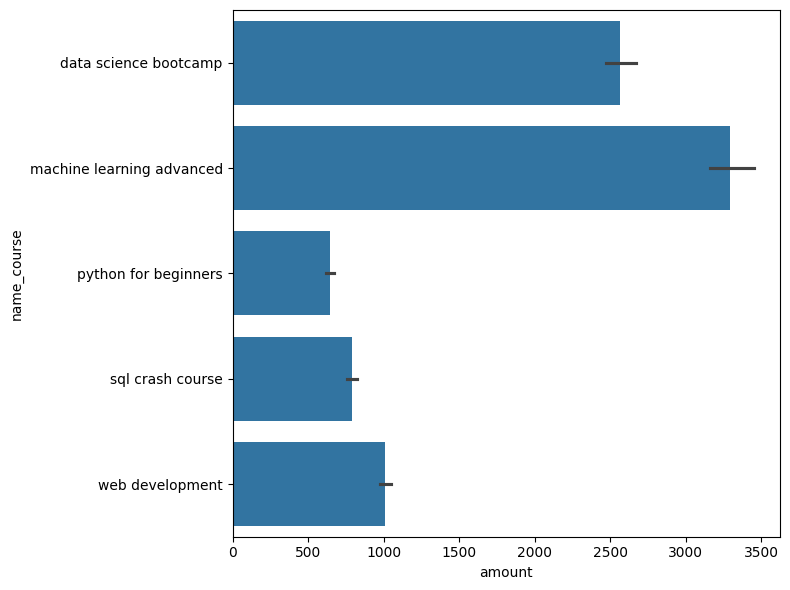

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='name_course', x='amount')
plt.tight_layout()
plt.show()

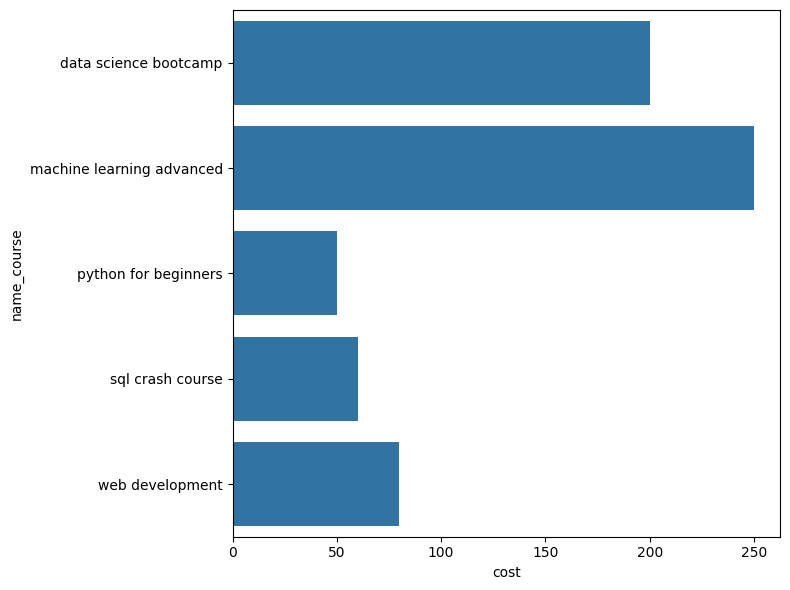

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, y='name_course', x='cost')
plt.tight_layout()
plt.show()

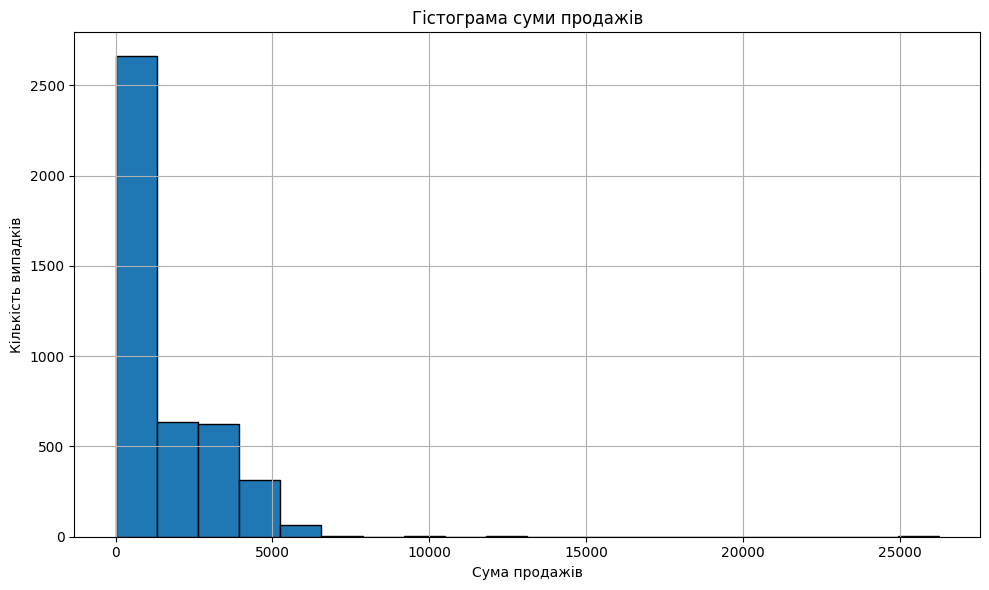

In [41]:
# Будуємо гісторраму по сумах продажів
plt.figure(figsize=(10, 6))
plt.hist(df['amount'], bins=20, edgecolor='black')
plt.title("Гістограма суми продажів")
plt.xlabel("Сума продажів")
plt.ylabel("Кількість випадків")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
df.amount.describe()

,amount
count,4320.000000
mean,1661.780093
std,1650.969266
min,0.000000
25%,660.000000
50%,1040.000000
75%,2600.000000
max,26250.000000


In [46]:
# Створюємо колонку "month" у форматі YYYY-MM
df['month'] = df['sales_date'].dt.to_period('M')

# Групуємо по місяцях та рахуємо суму продажів
monthly_sales = df.groupby('month')['amount'].sum()

# Виводимо щомісячні продажі (за 3 роки)
print(monthly_sales)

# Рахуємо середньомісячну суму продажів
average_monthly_sales = monthly_sales.median() # медіана, оскільки є викиди
print(f"\nСередньомісячна сума продажів: {average_monthly_sales:.2f}")

month
2023-01    302210
2023-02    249750
2023-03    310200
2023-04    318750
2023-05    282930
2023-06    115680
2023-07    129920
2023-08    115420
2023-09    294030
2023-10    321400
2023-11    322180
2023-12    308380
2024-01    317840
2024-02    271730
2024-03    303420
2024-04    272630
2024-05    270170
2024-06    119870
2024-07    132730
2024-08    119630
2024-09    287250
2024-10    308110
2024-11    278510
2024-12    291650
2025-01    288400
2025-02    241030
2025-03    260090
2025-04    271980
2025-05     73000
Freq: M, Name: amount, dtype: int64

Середньомісячна сума продажів: 278510.00


/tmp/ipython-input-2737704717.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



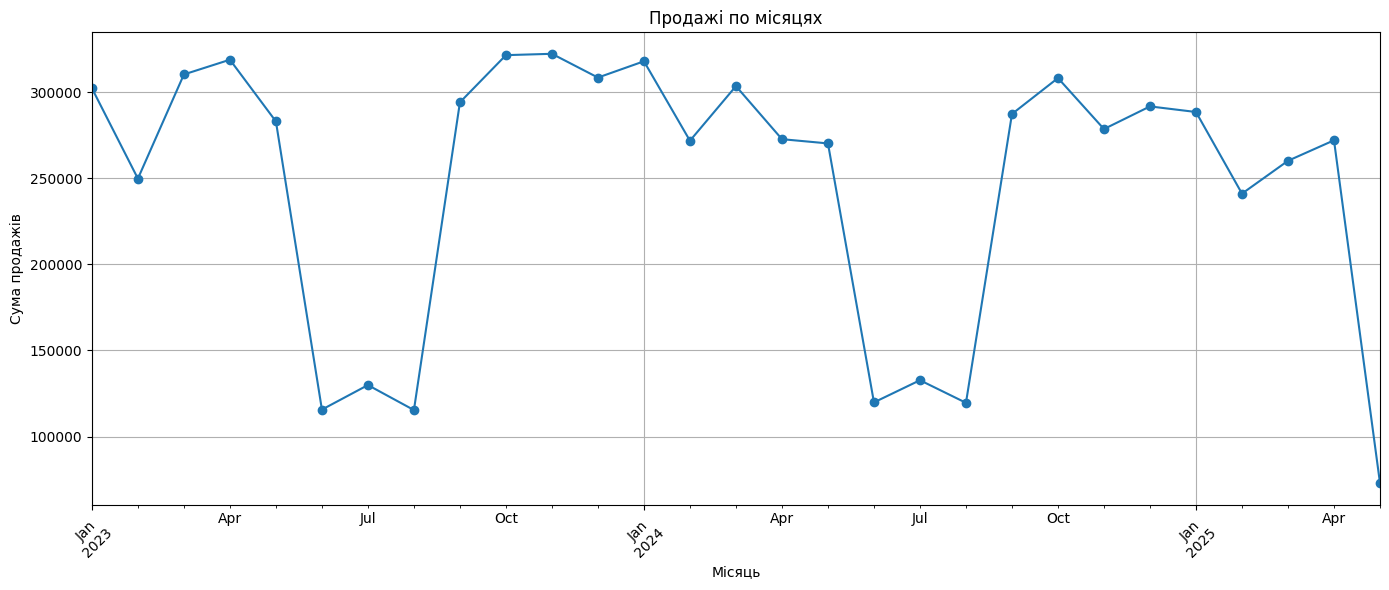

In [47]:
monthly_sales.plot(kind='line', marker='o', figsize=(14, 6))
plt.title("Продажі по місяцях")
plt.xlabel("Місяць")
plt.ylabel("Сума продажів")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2785579784.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2785579784.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='year', ylabel='month'>

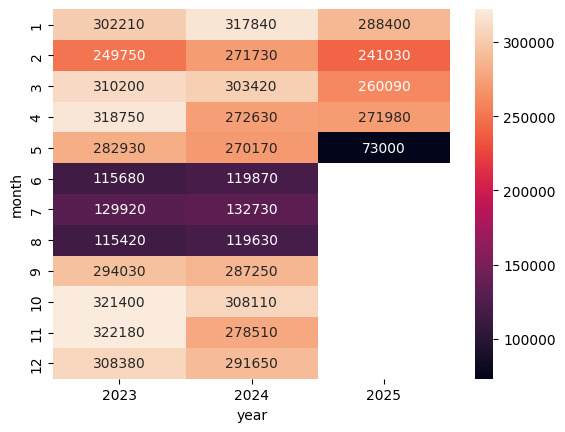

In [50]:
df['month'] = df['sales_date'].dt.month
df['year'] = df['sales_date'].dt.year
pivot = df.pivot_table(index='month', columns='year', values='amount', aggfunc='sum')
sns.heatmap(pivot, annot=True, fmt='.0f')

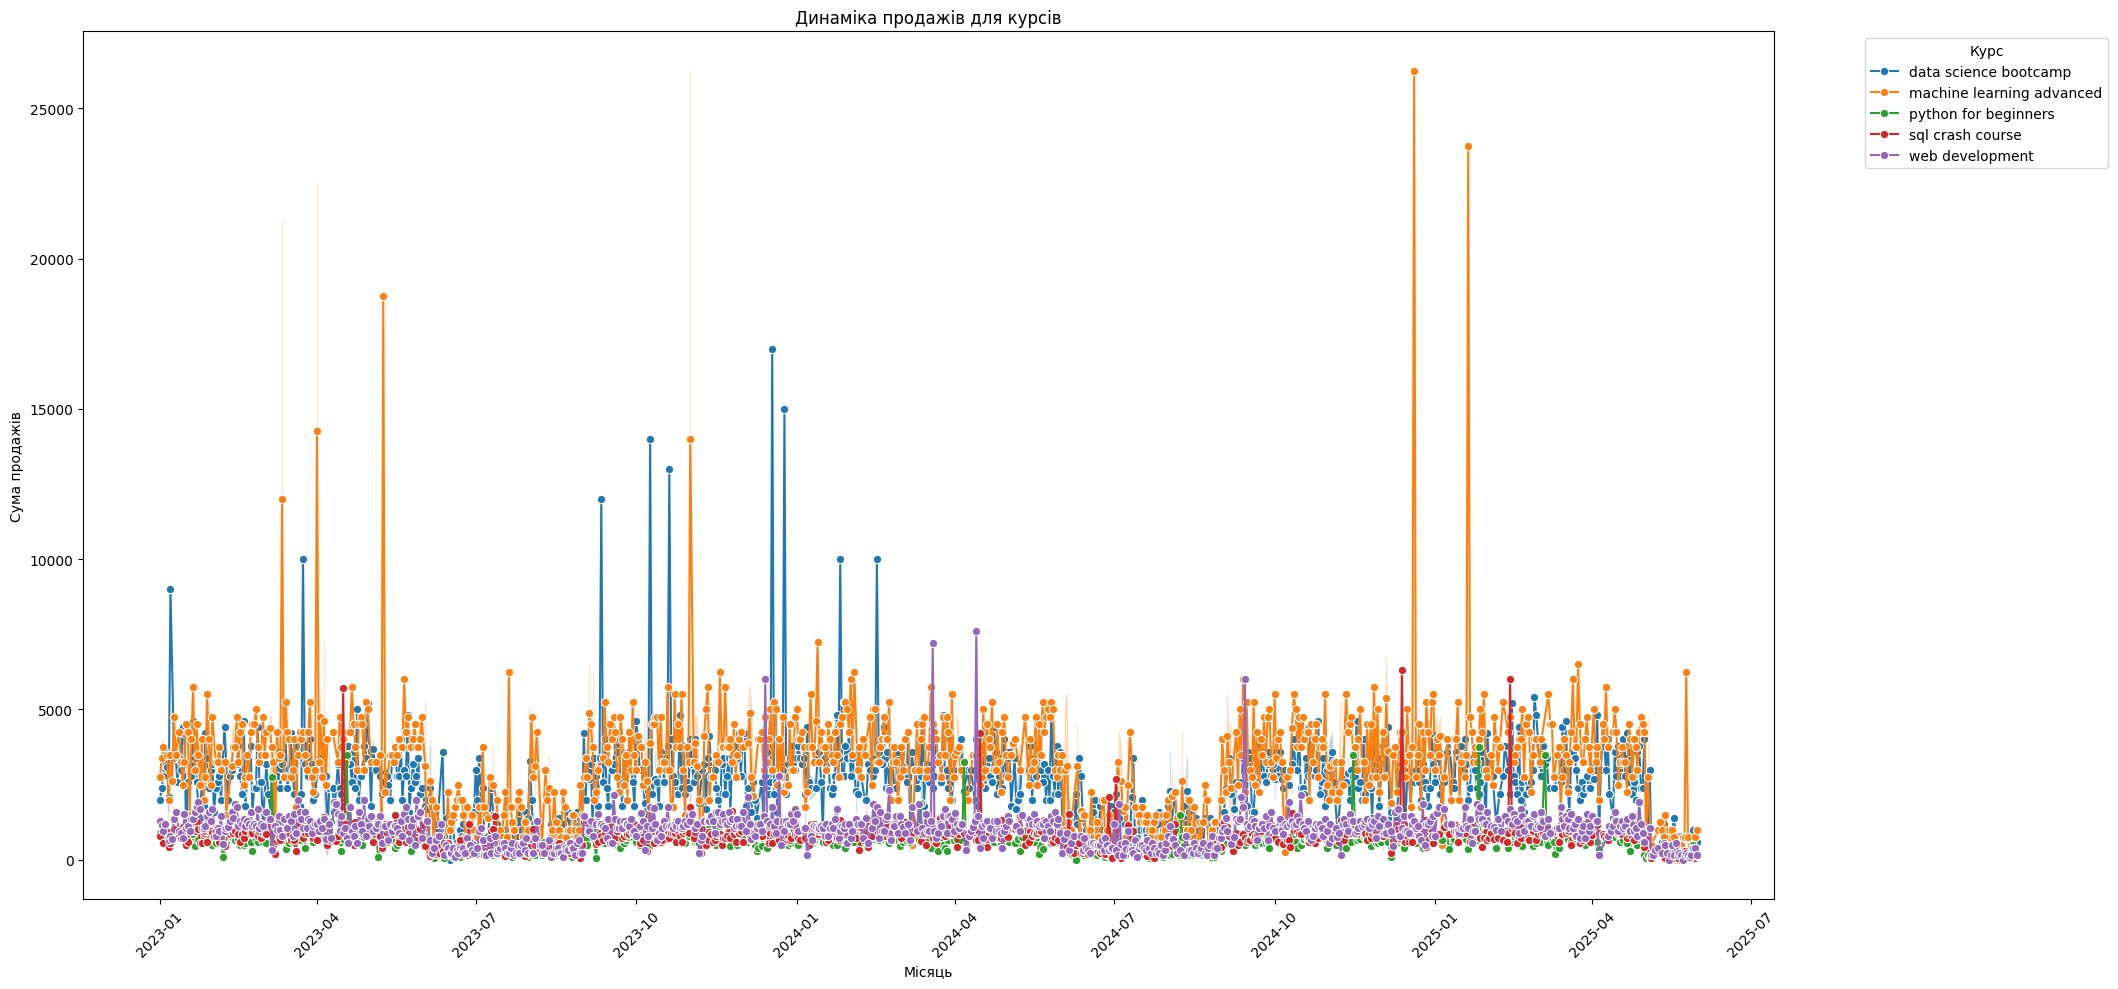

In [54]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=df, x='sales_date', y='amount', hue='name_course', marker='o')
plt.title('Динаміка продажів для курсів')
plt.xlabel('Місяць')
plt.ylabel('Сума продажів')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Курс', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [55]:
quantity_course = df.groupby('name_course').agg({
    'quantity': 'sum',
    'amount': 'sum'
})
quantity_course

/tmp/ipython-input-1844989574.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,quantity,amount
name_course,,
data science bootcamp,11108.0,2221600
machine learning advanced,11398.0,2849500
python for beginners,11061.0,553050
sql crash course,11351.0,681060
web development,10921.0,873680


### Етап 3: Висновки

* **Чому насправді впали продажі?**
* **Чи потрібно щось змінювати?**
* **Які рекомендації ви б дали керівництву?**


*** Чому насправді впали продажі?***

Згідно графіку " Продажі по місяцях", теплової карти, та гафіку "Динаміка продажів для курсів" бачимо падіння по сумі продажів з усіх курсів у період з травня по вересень протягом двох років, а також падіння у травні 2025. Це може бути викликано сезонністю, бо на період травень-вересень завжди випадає найбільша кількість відпусток працівників та відповідно, втрата інтересу до придбання навчальних курсів.



***

***Чи потрібно щось змінювати?***
***Які рекомендації ви б дали керівництву?***

Як видно зі зведеної таблиці:
Найбільш популярнимиє курси *machine learning advanced* - 2,8 млн грн та 11,4 тис проданих курсів.
Що говорить про високий попит на дані курси, при найвищий ціні з усіх курсів кількість куплених курсів теж найвища. Але кількість проданих курсів не сильно відрізняється від інших курсів, тому можна інвестувати в рекламу.

Такаж динаміка і у *data science bootcamp* — також високий дохід
2,2 млн грн — друге місце, проданих курсів 11,1 тис - третє місце.
Висока ціна та стабільна кількість покупців, також можна інвестувати в рекламу.

Курс *web development* — стабільний дохід
874 тис. грн — третє місце за доходом серед курсів, при цьому найменша кількість продавжів 10,9 тис. Оптимальне поєднання ціни та кількості.

Курс *python for beginners* — масовий, але дешевий.
Продажі 553 тис. грн — найменше з усіх, а кількість продажів велика 11,1 тис.
Курс надто дешевий, при тому, що має високий попит.
Можливо, варто трохи підняти ціну, щоб збільшити прибуток.

Курс *sql crash course* невеликий дохід, але велика поулярність за продажами - 11,4 тис. Так само як і  *python for beginners* курс надто дешевий, при тому, що має високий попит. Можливо підняти ціну, або зкомбінувати з курсом
 *python for beginners*.





